# Loan Approval Prediction

### Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the data

In [163]:
# Import Train, Test & Submission data
df_train = pd.read_csv("./Data/train.csv")
df_test = pd.read_csv("./Data/test.csv")
df_sub = pd.read_csv("./Data/sample_submission.csv")

In [164]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [166]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [167]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [168]:
df_sub.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [169]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [170]:
# Checking categorical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(categorical_cols))
print("\nSummary of Categorical Features:")
print("-" * 50)

for col in categorical_cols:
    unique_vals = df_train[col].unique()
    print(f"{col:<30}: {len(unique_vals)} ({', '.join(map(str, unique_vals))})")

Categorical Columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

Summary of Categorical Features:
--------------------------------------------------
person_home_ownership         : 4 (RENT, OWN, MORTGAGE, OTHER)
loan_intent                   : 6 (EDUCATION, MEDICAL, PERSONAL, VENTURE, DEBTCONSOLIDATION, HOMEIMPROVEMENT)
loan_grade                    : 7 (B, C, A, D, E, F, G)
cb_person_default_on_file     : 2 (N, Y)


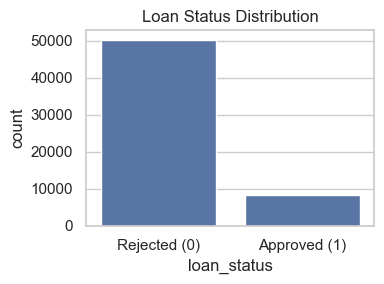

In [171]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df_train, x='loan_status')
plt.title("Loan Status Distribution")
plt.xticks([0, 1], ['Rejected (0)', 'Approved (1)'])
plt.tight_layout()
plt.show()

In [172]:
import plotly.express as px
import pandas as pd

# Group and calculate count
grouped_df = df_train.groupby(['loan_intent', 'loan_status']).size().reset_index(name='count')

# Calculate total per loan_intent
total_per_intent = grouped_df.groupby('loan_intent')['count'].transform('sum')

# Calculate percentage
grouped_df['percentage'] = (grouped_df['count'] / total_per_intent) * 100

# Format label: count (percentage)
grouped_df['label'] = grouped_df['count'].astype(str) + ' (' + grouped_df['percentage'].round(1).astype(str) + '%)'

# Map loan_status for better labels
grouped_df['loan_status'] = grouped_df['loan_status'].map({0: 'Not Approved', 1: 'Approved'})

# Plot stacked bar with proportions
fig = px.bar(
    grouped_df,
    x='loan_intent',
    y='percentage',
    color='loan_status',
    text='label',
    barmode='stack',
    labels={
        'loan_intent': 'Loan Intent',
        'percentage': 'Percentage of Loans',
        'loan_status': 'Loan Status'
    },
    title='Stacked Bar Chart: Loan Status by Loan Intent (in % and count)'
)

fig.show()

In [173]:
import plotly.express as px
import pandas as pd

# Group and calculate count
grouped_df = df_train.groupby(['person_home_ownership', 'loan_status']).size().reset_index(name='count')

# Calculate total per loan_intent
total_per_intent = grouped_df.groupby('person_home_ownership')['count'].transform('sum')

# Calculate percentage
grouped_df['percentage'] = (grouped_df['count'] / total_per_intent) * 100

# Format label: count (percentage)
grouped_df['label'] = grouped_df['count'].astype(str) + ' (' + grouped_df['percentage'].round(1).astype(str) + '%)'

# Map loan_status for better labels
grouped_df['loan_status'] = grouped_df['loan_status'].map({0: 'Not Approved', 1: 'Approved'})

# Plot stacked bar with proportions
fig = px.bar(
    grouped_df,
    x='person_home_ownership',
    y='percentage',
    color='loan_status',
    text='label',
    barmode='stack',
    labels={
        'person_home_ownership': 'Person Home Ownership',
        'percentage': 'Percentage of Loans',
        'loan_status': 'Loan Status'
    },
    title='Stacked Bar Chart: Loan Status by Loan Intent (in %)'
)



fig.show()

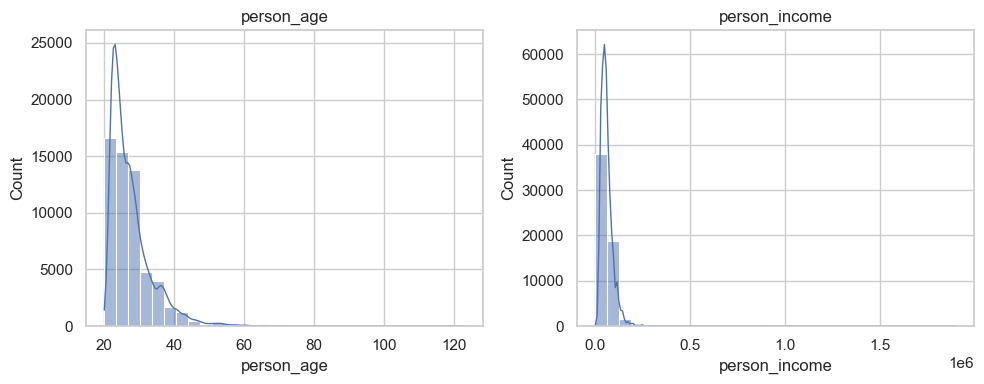

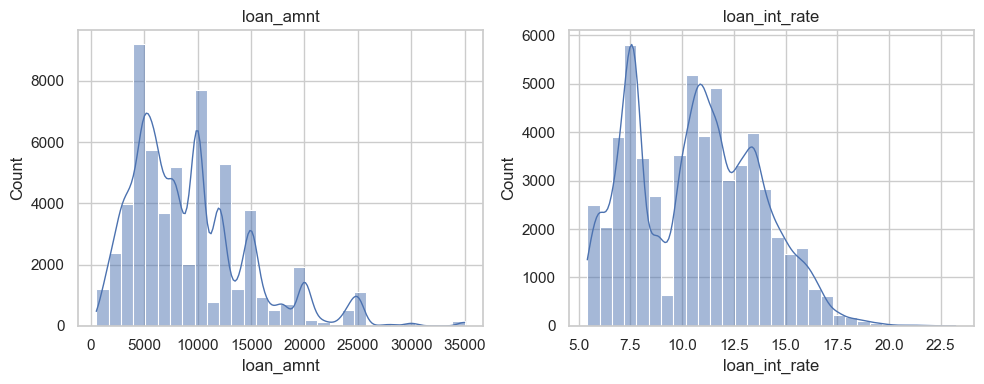

In [174]:
numerical_cols = ['person_age', 'person_income', 
                  'loan_amnt', 'loan_int_rate']

for i in range(0, len(numerical_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    for j in range(2):
        if i + j < len(numerical_cols):
            col = numerical_cols[i + j]
            sns.histplot(df_train[col], bins=30, kde=True, ax=axes[j], line_kws={"lw": 1})
            axes[j].set_title(f'{col}')
    
    plt.tight_layout()
    plt.show()

In [175]:
import plotly.express as px

fig = px.scatter_matrix(
    df_train,
    dimensions=['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'],
    color='loan_status',
    title='Pair Plot of Age, Income, Loan Amount, and Interest Rate by Loan Status',
    labels={
        'person_age': 'Age',
        'person_income': 'Income',
        'loan_amnt': 'Loan Amount',
        'loan_int_rate': 'Interest Rate',
        'loan_status': 'Loan Status'
    }
)

fig.update_layout(height=800)
fig.show()

In [176]:
import pandas as pd
import plotly.express as px

# Makeing a copy of the DataFrame to avoid changing the original
df_encoded = df_train.copy()

# Encodeing categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix using Plotly
fig = px.imshow(
    corr_matrix,
    text_auto=".2f",
    color_continuous_scale='RdBu_r',
    title="Correlation Matrix",
    labels=dict(color="Correlation"),
    x=corr_matrix.columns,
    y=corr_matrix.columns
)

fig.update_layout(height=800)
fig.show()

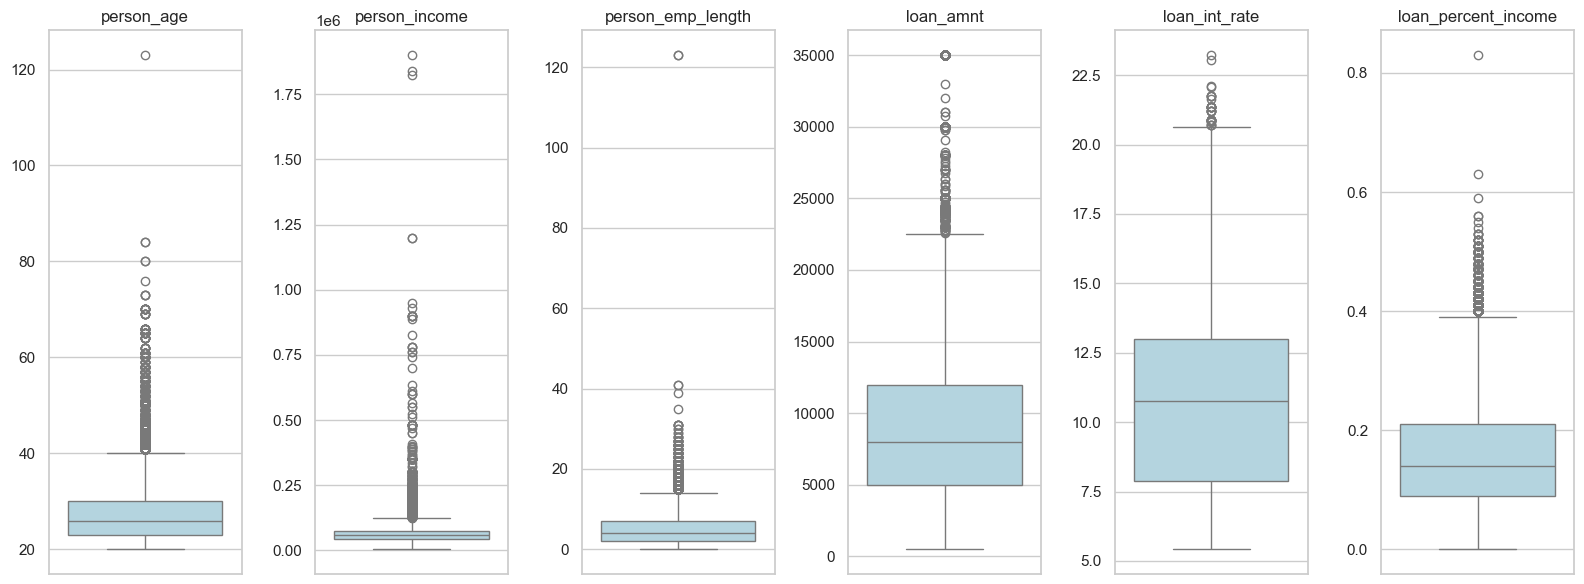

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    'person_age', 
    'person_income', 
    'person_emp_length', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income'
]

plt.figure(figsize=(16, 6))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.boxplot(y=df_train[col], color='lightblue')
    plt.title(col)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

#### Data Processing

In [178]:
import pandas as pd

def feature_engineering(df):
    # Label encode binary column
    df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})
    
    # Create new features
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']
    df['short_credit_history'] = (df['cb_person_cred_hist_length'] < 3).astype(int)
    df['high_int_rate'] = (df['loan_int_rate'] > 15).astype(int)

    # One-hot encode the multiclass categoricals
    df = pd.get_dummies(df, columns=[
        'person_home_ownership',
        'loan_intent',
        'loan_grade'
    ], drop_first=True)
    
    return df

# Apply to both train and test
df_train_fe = feature_engineering(df_train)
df_test_fe = feature_engineering(df_test)

In [179]:

X = df_train_fe.drop(['id', 'loan_status'], axis=1)
y = df_train_fe['loan_status']

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_proba = rf.predict_proba(X_val)[:, 1]  # for ROC AUC

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_val, y_proba))

Confusion Matrix:
 [[9956  103]
 [ 488 1182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.92      0.71      0.80      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729


ROC AUC Score: 0.9343874731896182


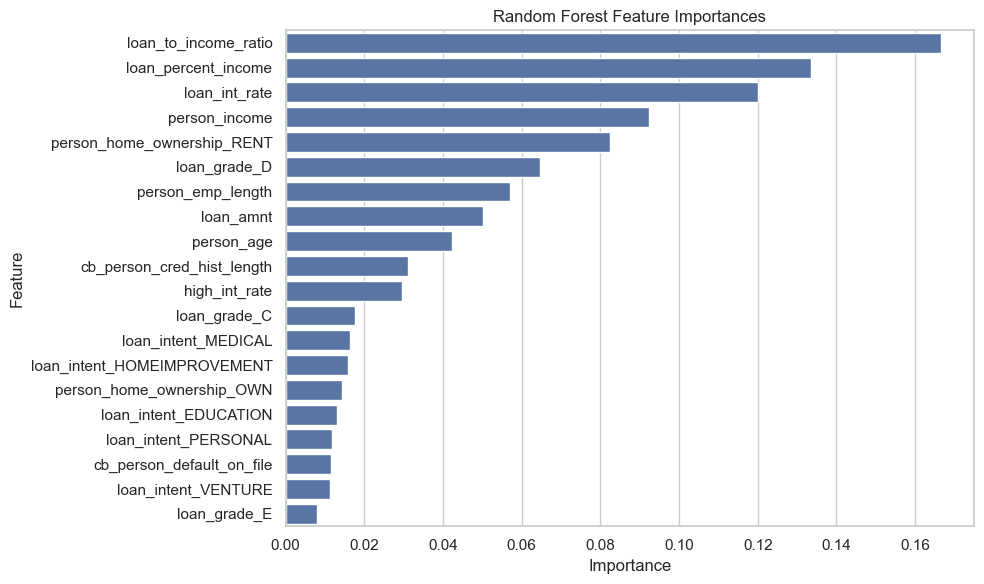

In [182]:
importances = rf.feature_importances_
features = X_train.columns

feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(20), legend=False)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [183]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_val)
y_proba = xgb.predict_proba(X_val)[:, 1]  # for ROC AUC

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_val, y_proba))

Confusion Matrix:
 [[9926  133]
 [ 447 1223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10059
           1       0.90      0.73      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729


ROC AUC Score: 0.9521289065174154


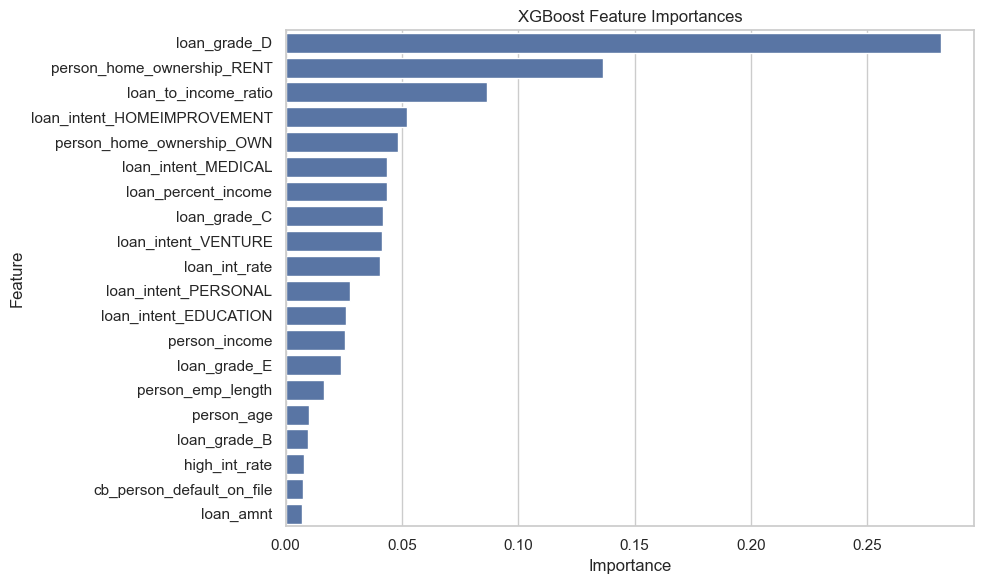

In [184]:


importances = xgb.feature_importances_
features = X_train.columns

feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(20), legend=False)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

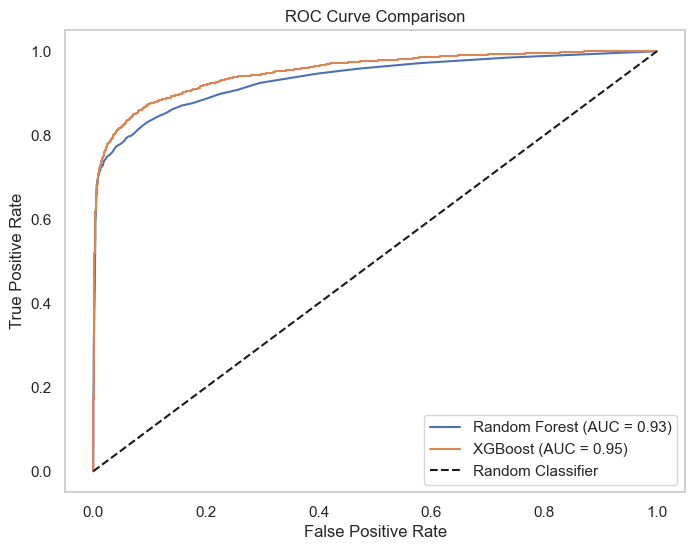

In [185]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf.predict_proba(X_val)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb.predict_proba(X_val)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

In [187]:
df_sub.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [ ]:
xgb_full = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_full.fit(X, y)

missing_cols = set(X.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0 


X_test = df_test[X.columns]

final_predictions = xgb_full.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'id': df_test['id'],
    'loan_status': final_predictions
})

submission['loan_status'] = submission['loan_status'].round(4)
submission.to_csv("final_submission.csv", index=False)
print("Predictions:", final_predictions.shape)
print("Test IDs:", df_test['id'].shape)

Predictions: (39098,)
Test IDs: (39098,)


In [196]:
submission.head()

,id,loan_status
0,58645,0.8498
1,58646,0.0267
2,58647,0.8846
3,58648,0.0050
4,58649,0.2977
